# Importing Required Libraries

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and Exploring the Dataset

In [7]:
data = pd.read_csv('breast-cancer.csv')
print(data.info())
print(data.describe())
print(data.isnull().sum)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA

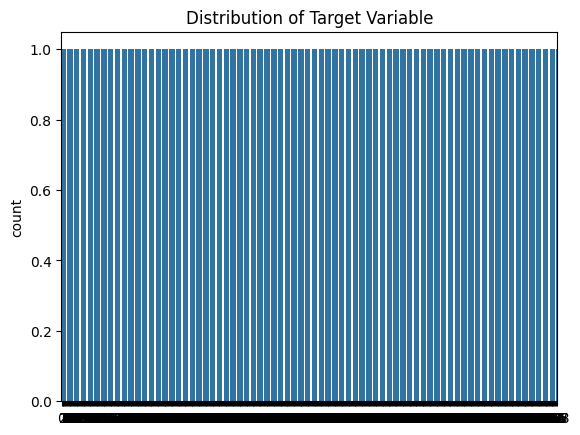

C:\Users\MR.H.BALAJEE\.conda\envs\AIML1\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


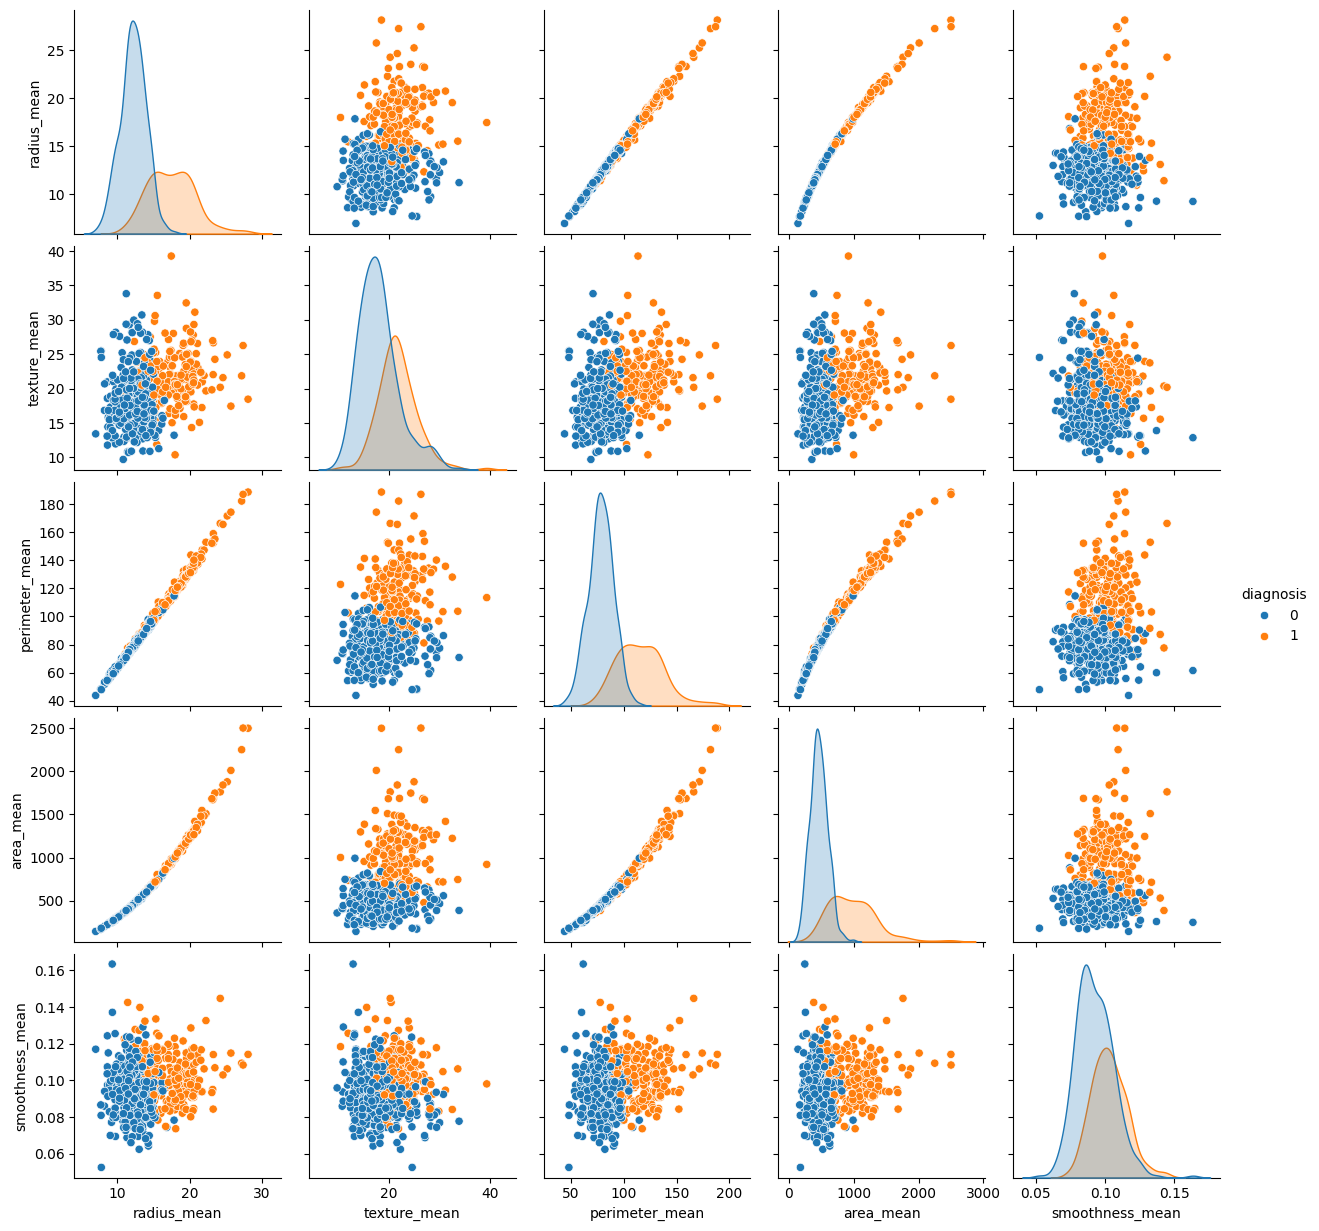

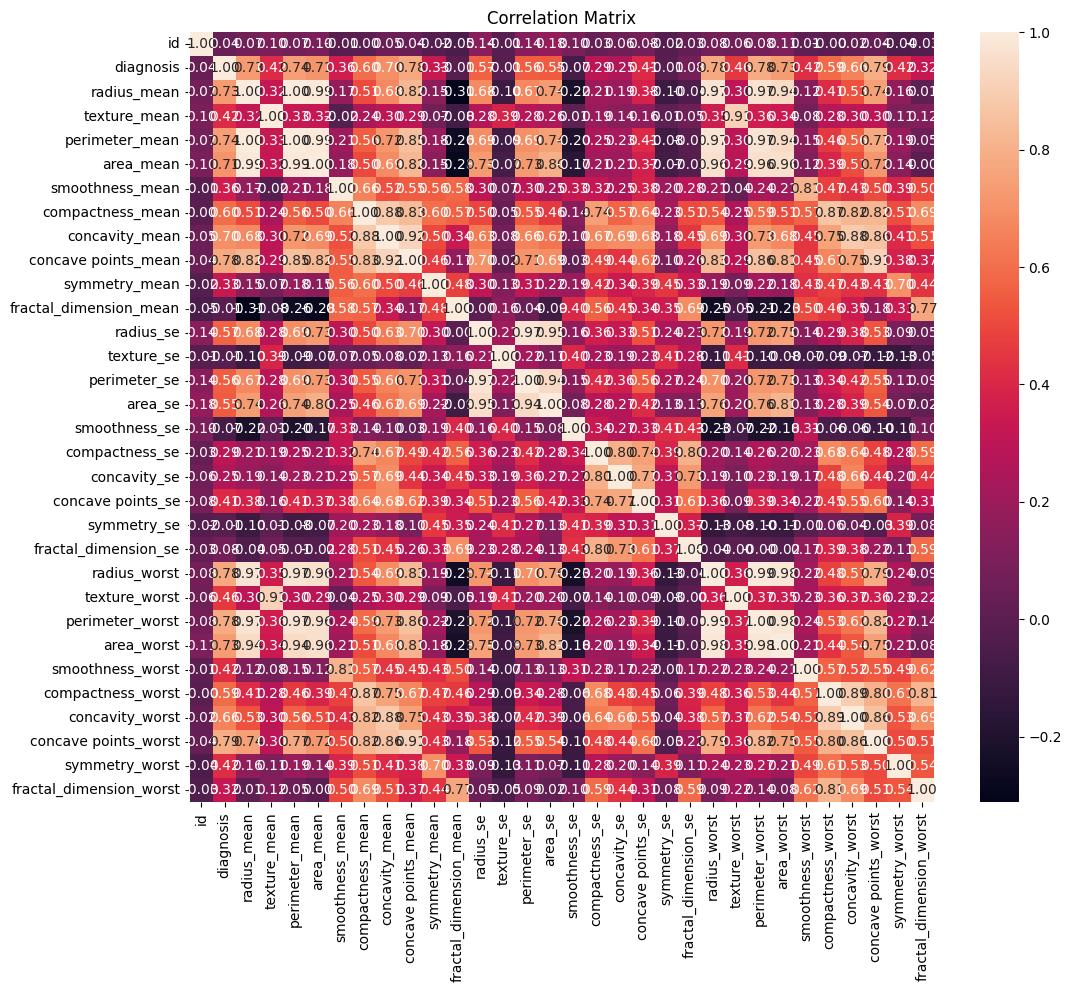

In [10]:
# Distribution of target variable
sns.countplot(data['diagnosis'])
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Preprocess Data

In [11]:
# Split features and target
X = data.drop(['id', 'diagnosis'], axis=1).values
y = data['diagnosis'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementing K-NN Algorithm

In [12]:
# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# k-NN function
def k_nearest_neighbors(X_train, y_train, X_test, k=5):
    y_pred = []
    for x_test in X_test:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)

# Optimize K

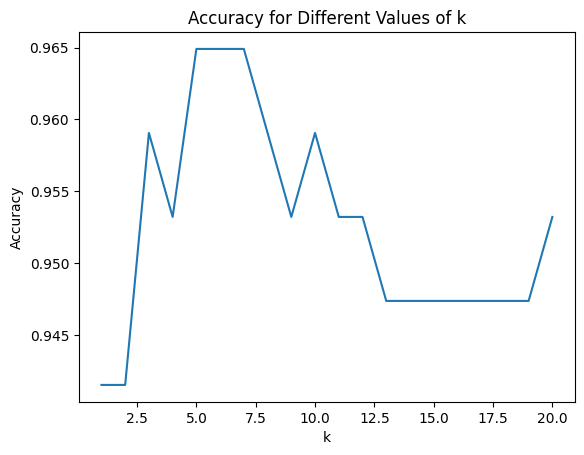

Best k: 5


In [13]:
# Function to calculate accuracy for different values of k
def evaluate_k(X_train, y_train, X_test, y_test, max_k=20):
    accuracies = []
    for k in range(1, max_k + 1):
        y_pred = k_nearest_neighbors(X_train, y_train, X_test, k)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Evaluate k from 1 to 20
accuracies = evaluate_k(X_train, y_train, X_test, y_test, max_k=20)
plt.plot(range(1, 21), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of k')
plt.show()

# Choose the best k
best_k = np.argmax(accuracies) + 1
print(f"Best k: {best_k}")

# Evaluating the Final Model

In [14]:
# Final k-NN model with the best k
y_pred_final = k_nearest_neighbors(X_train, y_train, X_test, best_k)

# Evaluate the final model
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {accuracy_final:.2f}")

# Classification report for the final model
print(classification_report(y_test, y_pred_final, target_names=['Benign', 'Malignant']))

Final Model Accuracy: 0.96
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       107
   Malignant       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

